In [1]:
from quafu import User
import numpy as np
from quafu import QuantumCircuit, simulate
from qiskit import QuantumCircuit as QiskitCircuit
from qiskit.visualization import plot_circuit_layout, circuit_drawer
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置中文支持
rcParams['font.sans-serif'] = ['Arial Unicode MS']
rcParams['axes.unicode_minus'] = False

In [2]:
# 初始化任务管理器
# token = 'Zy3wX7b:[rsqbuwTfQWrK7yH`pdLHSOMLPdNt[EOUPs/Rgzh{OzdUOz5TP{F{NyFUO{dUN7JDd5WnJtJTPypkN2pUOyBTOz1TNy1DOzBkNjpkJ1GXbjxjJu:3ZvxXbi23[BGkOv:Xb1Onc2[X[3G3ejpkJzW3d2Kzf'
# tmgr = Task(token)
# 初始化用户（请确保API密钥的安全性）
user = User("您的API密钥")
user.save_apitoken()

In [3]:

def generate_numbers(total_numbers, pick_count):
    """
    使用量子电路随机生成指定范围内的不重复数字。

    :param total_numbers: 可选数字的总数 (红号: 35, 蓝号: 12)
    :param pick_count: 需要随机生成的数字个数 (红号: 5, 蓝号: 2)
    :return: 随机生成的不重复数字列表
    """
    # 确定需要的量子比特数
    n_qubits = int(np.ceil(np.log2(total_numbers)))

    # 创建量子电路
    qc = QuantumCircuit(n_qubits)

    # 对所有量子比特施加Hadamard门
    for q in range(n_qubits):
        qc.h(q)

    # 设置测量
    qubits = list(range(n_qubits))
    qc.measure(qubits, qubits)  # 将 cbit 作为位置参数传递

    # 绘制量子电路
    try:
        print("\n量子电路结构：")
        qc.draw_circuit(width=4)  # 在控制台打印电路
        qc.plot_circuit(title="量子电路")  # 使用内置方法绘制电路
        plt.show()  # 显示绘制的电路

        # 将 Quafu 电路转换为 Qiskit 电路
        qasm_str = qc.to_openqasm()
        qk_circuit = QiskitCircuit.from_qasm_str(qasm_str)

        # 绘制电路
        circuit_drawer(qk_circuit, output='mpl')
        plt.title("量子电路")
        plt.show()

    except Exception as e:
        print(f"无法绘制电路: {e}")

    # 模拟量子电路
    simu_res = simulate(qc)

    # 获取测量结果的计数
    counts = simu_res['counts']

    # 将计数转换为概率分布
    total_counts = sum(counts.values())
    probabilities = {state: count / total_counts for state, count in counts.items()}

    # 准备测量结果和对应的概率
    outcomes = []
    probs = []

    for state, prob in probabilities.items():
        # 将二进制字符串转换为整数索引
        idx = int(state, 2)
        if idx < total_numbers:
            outcomes.append(idx + 1)  # 索引从0开始，需要加1
            probs.append(prob)

    # 如果可能的结果数量不足，需要调整
    if len(outcomes) < pick_count:
        raise ValueError("可能的结果数量不足以选择所需的不重复数字。")

    # 按概率生成不重复的随机数字
    valid_probs = np.array(probs)
    valid_probs /= valid_probs.sum()  # 归一化
    selected_numbers = np.random.choice(
        outcomes, size=pick_count, replace=False, p=valid_probs
    )
    return sorted(selected_numbers)


量子电路结构：
q[0]  --H-- M->c[0]
           
q[1]  --H-- M->c[1]
           
q[2]  --H-- M->c[2]
           
q[3]  --H-- M->c[3]
           
q[4]  --H-- M->c[4]
           
q[5]  --H-- M->c[5]


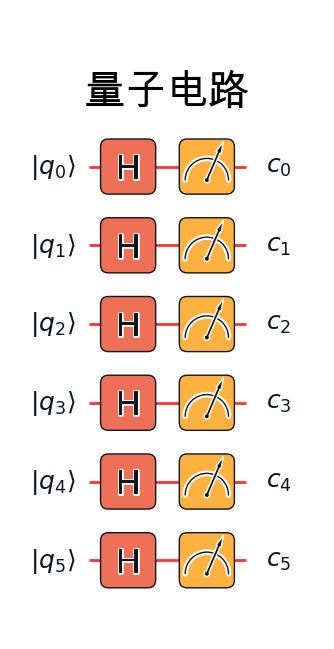

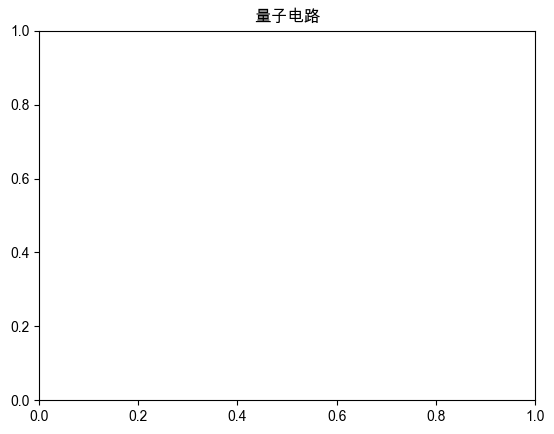


量子电路结构：
q[0]  --H-- M->c[0]
           
q[1]  --H-- M->c[1]
           
q[2]  --H-- M->c[2]
           
q[3]  --H-- M->c[3]


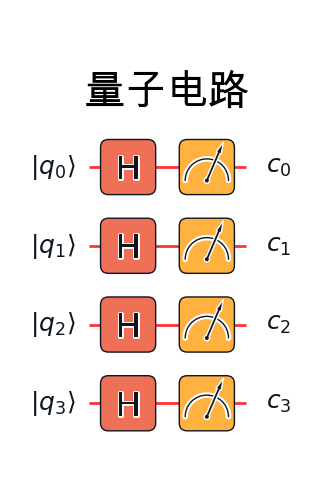

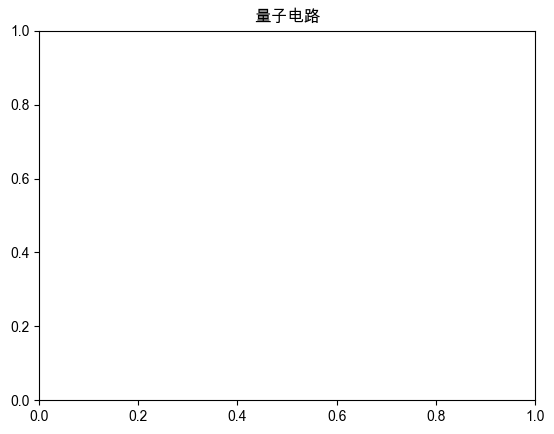

In [4]:
# 生成红号和蓝号
red_numbers = generate_numbers(total_numbers=35, pick_count=5)  # 红号从1到35选5个
blue_numbers = generate_numbers(total_numbers=12, pick_count=2)  # 蓝号从1到12选2个


In [5]:
print("\n大乐透生成结果：")
print(f"红号: {red_numbers}")
print(f"蓝号: {blue_numbers}")


大乐透生成结果：
红号: [10, 17, 23, 24, 30]
蓝号: [9, 12]
